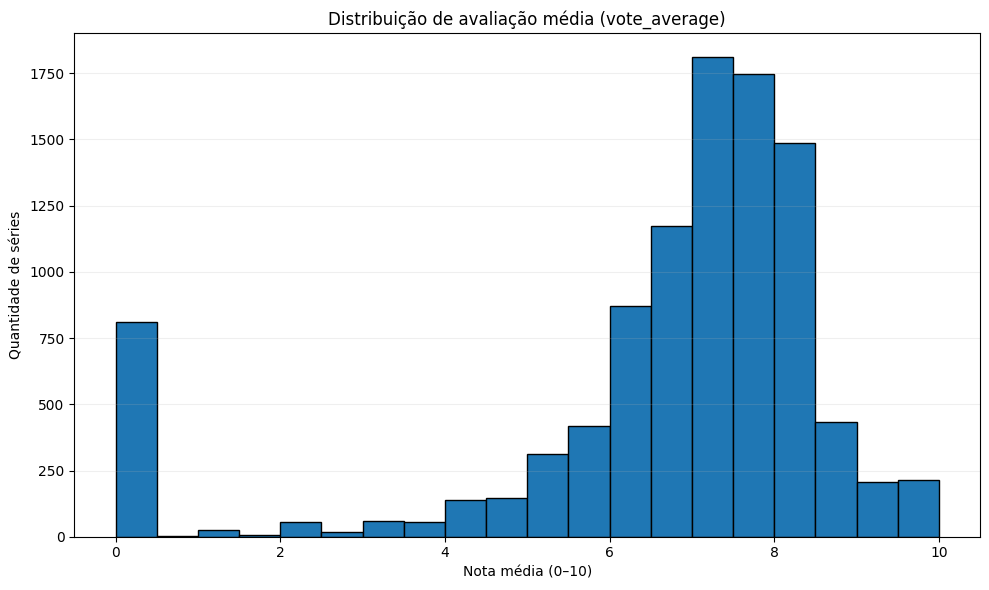

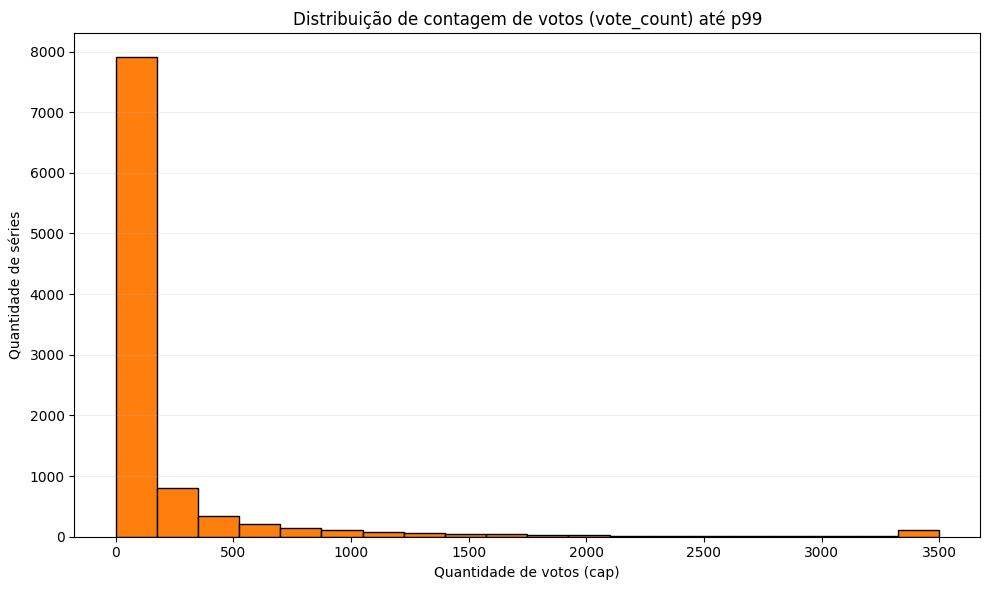

In [ ]:
# Seção: Extração
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leia o arquivo conforme seu nome real
df = pd.read_csv('data/tmdb_popular.csv')

# Inspeção inicial
##display(df.head())
##display(df[['name','first_air_date','popularity','vote_average','vote_count']].info())
##display(df[['popularity','vote_average','vote_count']].describe())

# Seção: Transformação
# Parse de data e criação de ano (para filtros opcionais)
df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')
df['year'] = df['first_air_date'].dt.year

# Limpeza simples: remover linhas sem vote_average/vote_count
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['vote_average','vote_count'])

# Opcional: limitar extremos de vote_count para análise de distribuição (winsorize-like)
# Mantém até o percentil 99 para reduzir distorção no histograma
p99_votes = np.nanpercentile(df_clean['vote_count'], 99)
df_clean['vote_count_capped'] = df_clean['vote_count'].clip(upper=p99_votes)

# Seção: Visualização 1 — Histograma de vote_average
plt.figure(figsize=(10,6))
plt.hist(df_clean['vote_average'], bins=20, edgecolor='black', color='tab:blue')
plt.title('Distribuição de avaliação média (vote_average)')
plt.xlabel('Nota média (0–10)')
plt.ylabel('Quantidade de séries')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()



# Seção: Carga (opcional)
# df_clean[['name','vote_average','vote_count_capped','year']].to_csv('outputs/tvshows_clean_sample.csv', index=False)
